<div dir=rtl>
<font color='red' size="6">آماده سازی نوت بوک</font>
<div dir=rtl>

><font size = "4"> 1.  قبل از هر کاری، با استفاده از مسیر نوشته شده در خط پایین، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.



<div dir=ltr>
<font size = "4" color='green'>
File --> Save a copy in Drive
</font>
<div dir=rtl>

><font size = "4"> 2.   برای دسترسی به تصاویر مورد نیاز در این تکلیف، بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید. با این کار فایل های مربوط به تکلیف (تصاویر) دانلود و در فولدر کولب شما قرار داده می شوند. انجام این مرحله پس از هر بار قطع شدن از کولب و اتصال دوباره، ضروری است. یعنی اگر مثلا یک سوال را حل کردید و بعد کولب را بستید یا مدتی با آن کار نکردید و اتصالتان به طور خودکار قطع شد، در اقدام بعدیتان برای نوشتن بقیه‌ی تمرین، حتما این بلوک باید دوباره اجرا شود.

In [1]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW' -O 'HW4_data.zip'
!unzip HW4_data.zip

--2024-01-24 22:00:19--  https://drive.google.com/uc?export=download&id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW
Resolving drive.google.com (drive.google.com)... 172.253.63.139, 172.253.63.102, 172.253.63.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW&export=download [following]
--2024-01-24 22:00:19--  https://drive.usercontent.google.com/download?id=1vJrAqaPADRn0bHn6GCSdqGwQ0vZDWXIW&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1706229 (1.6M) [application/octet-stream]
Saving to: ‘HW4_data.zip’

HW4_data.zip        100%[===================>]   1.63M  --.-KB/s  

# Imports
<div dir=rtl>
<font color="green" size="6">فراخوانی کتابخانه ها</font>
<div dir=rtl>




In [2]:
import matplotlib.image as mpimg
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import sys
import cv2 as cv
from scipy.fft import fft2, fftshift, ifft2

# Any Helper Functions

<div dir=rtl>
<font color="green" size = "4">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید (همه در همین بلوک).</font>
</div>



In [ ]:
###

# ENTER YOUR CODE HERE.

###

# Question 5: Edge Detection (15%)

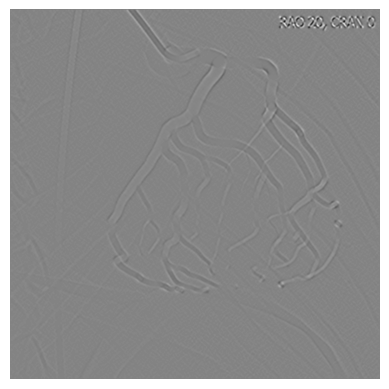

In [48]:
#@title Q5 - Part 1 (Sobel) (5%)
main_image = cv.imread('angio.png', cv.IMREAD_GRAYSCALE)
edges_of_sobel = cv.Sobel(main_image, cv.CV_64F, 1, 1, ksize=13)
plt.imshow(edges_of_sobel, cmap='gray')
plt.axis('off')
plt.show()

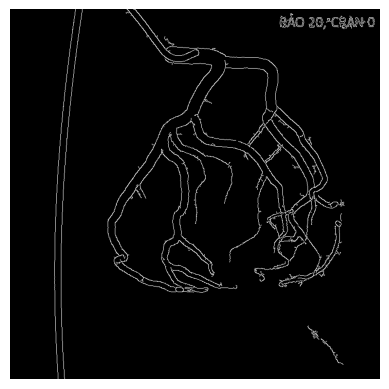

In [49]:
#@title Q5 - Part 2 (Canny) (5%)
edge_of_canny = cv.Canny(main_image, 20, 100)
plt.imshow(edge_of_canny, cmap='gray')
plt.axis('off')
plt.show()

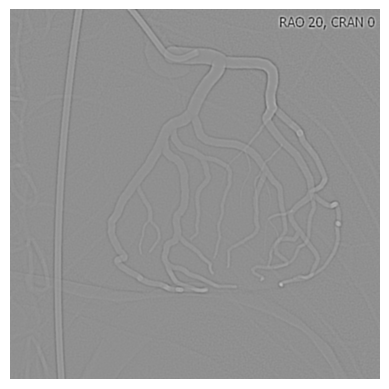

In [50]:
#@title Q5 - Part 3 (LoG) (5%)
edge_of_log = cv.Laplacian(main_image, cv.CV_64F, ksize=13)
plt.imshow(edge_of_log, cmap='gray')
plt.axis('off')
plt.show()

# Question 6: Hough Transform (15%)

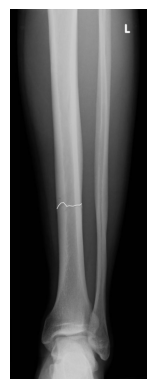

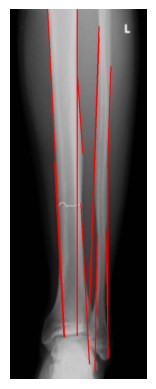

In [51]:
#@title Q6 - Part 1 (60%)
main_image2 = cv.imread("bone.jpg")
plt.imshow(main_image2)
plt.axis('off')
plt.show()
gaussianBlur = cv.GaussianBlur(main_image2, (7, 7), 0)
lines_of_image =+ gaussianBlur
edges_of_image = cv.Canny(gaussianBlur, 40, 100)
path = cv.HoughLinesP(edges_of_image, 1, np.pi / 180, threshold=100, minLineLength=200, maxLineGap=400)
if path is not None:
    for line in path:
        x1, y1, x2, y2 = line[0]
        cv.line(lines_of_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
plt.imshow(lines_of_image)
plt.axis('off')
plt.show()

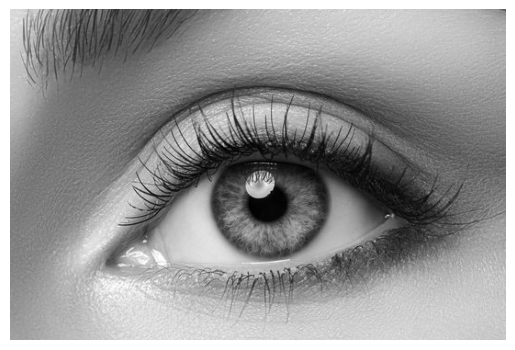

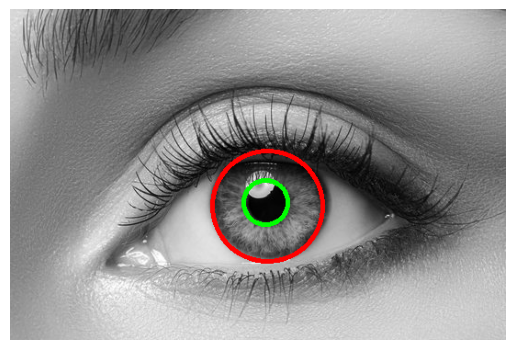

In [52]:
#@title Q6 - Part 2 (40%)
main_image3 = cv.imread("eye.jpg", 0)
plt.imshow(main_image3, cmap='gray')
plt.axis('off')
plt.show()
gaussianBlur = cv.GaussianBlur(main_image3, (11, 11), 0)
lines_of_image3 = main_image3.copy()
lines_of_image3 = cv.cvtColor(lines_of_image3, cv.COLOR_BGR2RGB)
circles = cv.HoughCircles(gaussianBlur, cv.HOUGH_GRADIENT, dp=1, minDist=3, param1=100, param2=30, minRadius=22, maxRadius=63)

if circles is not None:
    circles = np.round(circles[0, :]).astype(int)
    for (x, y, r) in circles:
        if r < 50:
            cv.circle(lines_of_image3, (x, y), r, (0, 255, 0), 3)
        else:
            cv.circle(lines_of_image3, (x, y), r, (255, 0, 0), 3)
plt.imshow(lines_of_image3)
plt.axis('off')
plt.show()

# Question 7: Feature-Based Registration (20%)

[[ -0.40366418  -0.34044695 270.22649487]
 [ -0.28085363   0.55365412  67.10771089]]


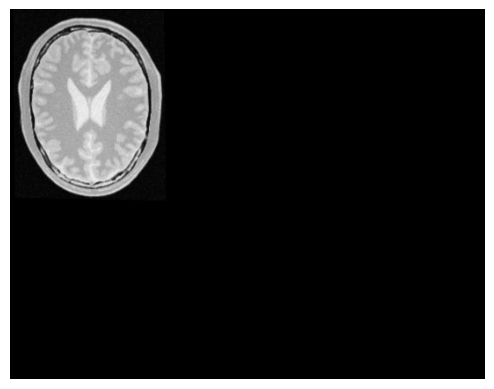

In [53]:
import numpy as np

image1 = cv.imread('MRIF.png')
image2 = cv.imread('MRIS.png')
# فرض می کنیم کاربر مختصات زیر را وارد کرده است ،یو ای در کولب کار نمی کرد مجبور شدم ایجوری بهش مختصات بدم
points1 = np.float32([[92, 102], [87, 142], [126, 147]])
points2 = np.float32([[272, 201], [238, 256], [165, 228]])



affine_matrix = cv.getAffineTransform(points2, points1)


print(affine_matrix)


transformed_image = cv.warpAffine(image2, affine_matrix, (image2.shape[1], image2.shape[0]))
plt.imshow(transformed_image, cmap='gray')
plt.axis('off')
plt.show()

# Question 8: Similarity-based Segmentation (20%)

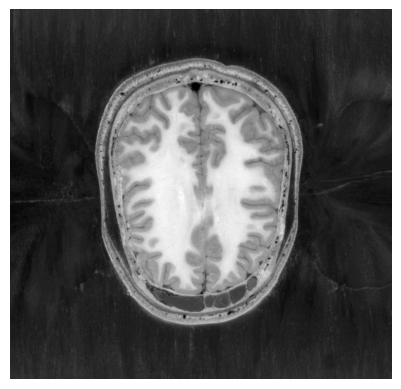

In [54]:
#@title Q8 - Part 1
main_image4 = cv.imread('Color_MRI.png', cv.IMREAD_GRAYSCALE)
plt.imshow(main_image4, cmap='gray')
plt.axis('off')
plt.show()

In [55]:
#@title Q8 - Part 2
white = (375, 375)
gray = (375, 175)


In [56]:
#@title Q8 - Part 3 (5%)
seeds = np.zeros(main_image4.shape, dtype=np.uint8)
seeds[gray[1], gray[0]] = 120
seeds[white[1], white[0]] = 210
# plt.imshow(seeds, cmap='gray')
# plt.axis('off')
# plt.show()

In [57]:
#@title Q8 - Part 4 (50%)
def region_growing(img, seed_image, seed_value=255, threshold_mode='constant', threshold_diff=35, element=None):
    if element is None:
        element = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
    mask = np.zeros(img.shape, dtype=np.uint8)
    iterations = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if seed_image[i, j] != seed_value:
                continue
            mask[i, j] = 1
            threshold = img[i, j]
            i = True
            while i:
                expanded_mask = cv.dilate(mask, element, iterations=1)
                neighbors = np.subtract(expanded_mask, mask)
                neighbors = neighbors * (np.abs(np.subtract(img, threshold, dtype=np.float32)) < threshold_diff).astype(np.uint8)
                mask += neighbors
                if np.count_nonzero(neighbors) == 0:
                    i = False
                if threshold_mode == 'variable':
                    threshold = np.sum(img * mask) / np.count_nonzero(mask)
                iterations += 1

            break
    return mask, iterations

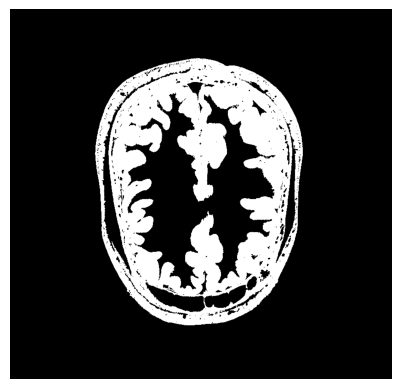

In [58]:
#@title Q8 - Part 5 (15%)
empty = np.zeros(main_image4.shape, dtype=np.uint8)
ans, iterations = region_growing(main_image4 , seeds, seed_value=120, threshold_mode='variable', threshold_diff=35)
plt.imshow(ans, cmap='gray')
plt.axis('off')
plt.show()

In [59]:
#@title Q8 - Part 6 (10%)
ans1, iterations1 = region_growing(main_image4, seeds, seed_value=120, threshold_mode='constant', threshold_diff=35)
ans2, iterations2 = region_growing(main_image4, seeds, seed_value=210, threshold_mode='constant', threshold_diff=35)
ans3, iterations3 = region_growing(main_image4, seeds, seed_value=120, threshold_mode='variable', threshold_diff=35)
ans4, iterations4 = region_growing(main_image4, seeds, seed_value=210, threshold_mode='variable', threshold_diff=35)

In [60]:
#@title Q8 - Part 7 (5%)
print('Gray constant =', iterations1)
print('White constant =', iterations2)
print('Gray variable =', iterations3)
print('White variable =', iterations4)

Gray constant = 933
White constant = 424
Gray variable = 922
White variable = 422


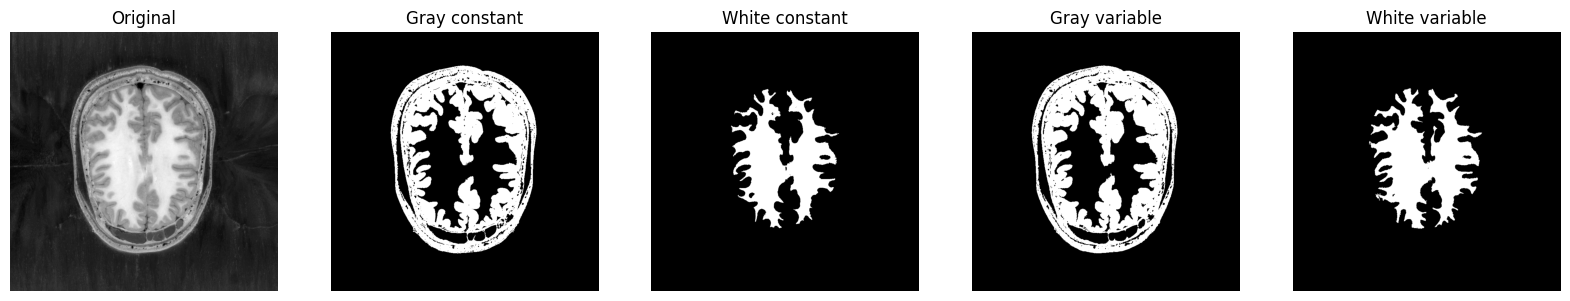

In [63]:
#@title Q8 - Part 8 (15%)
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

axs[0].imshow(main_image4, cmap='gray');
axs[0].set_title("Original")

axs[1].imshow(ans1, cmap='gray')
axs[1].set_title("Gray constant")

axs[2].imshow(ans2, cmap='gray')
axs[2].set_title("White constant")

axs[3].imshow(ans3, cmap='gray')
axs[3].set_title("Gray variable")

axs[4].imshow(ans4, cmap='gray')
axs[4].set_title("White variable");

for ax in axs:
    ax.axis('off')
plt.show()

هر دو خوب عمل کردند ولی به نظرم متغیر یذره بهتر عمل کرده است و همچنین سرعت بالاتری هم دارد،با این حال هر دو تقریبا ایتریشن برابر دارند.